## Value Function Iteration with Grid Search

In this notebook, I will solve a simple Dynamic Programming Problem: The Neoclassical Growth Model without uncertainty. I will solve the DP problem by discretizing the Bellman equation and performing value function iteration. The maximization problem is carried on using grid search (brute force). 

This note aims to be pedagogical, and does not try to achieve maximum performance.

##### Neoclassical growth model

Consider the Neoclassical growth model: the production function is $k^\alpha$ and capital depreciates at rate $\delta$. The law of motion for the capital stock is:

$k_{t+1} = (1-\delta) k_t + k^\alpha_t - c_t.$

The representative household chooses a consumption sequence to maximize the following utility function:

$\sum_{t=0}^\infty \beta^t \log(c_t).$

It is easy to show that the steady-state capital stock is given by:

$k_{ss} = \left(\dfrac{\alpha}{1/\beta - (1-\delta)} \right)^{\frac{1}{1-\alpha}}.$

##### Bellman Equation

The Bellman Equation associated to this problem is:

$V(k) = \max_{k'} \{\log(k^\alpha + (1-\delta) - k') + \beta V(k')\},$

with the policy function: $k' = g(k)$. 

##### Numerical Implementation

First, define the parameters of the model: $\alpha = 0.3$, $\beta = 0.96$, and $\delta = 0.1$. Second, discretize the capital space in $n_k = 200$ points. The points are defined in a grid (a vector) linearly spaced between $2\times k_{ss}/n_k$ and $2\times k_{ss}$.

In [62]:
# Packages
import numpy as np
import matplotlib.pyplot as plt


# parameters
alpha = 0.3
beta = 0.96
delta = 0.1

k_ss = (alpha/((1/beta)-(1-delta)))**(1/(1-alpha)) # SS capital
nK = 200 # grid points
gK = np.linspace(2*k_ss/nK, 2*k_ss, num=nK) # array 

print(gK) 

[0.02920822 0.05841644 0.08762466 0.11683289 0.14604111 0.17524933
 0.20445755 0.23366577 0.26287399 0.29208221 0.32129044 0.35049866
 0.37970688 0.4089151  0.43812332 0.46733154 0.49653977 0.52574799
 0.55495621 0.58416443 0.61337265 0.64258087 0.67178909 0.70099732
 0.73020554 0.75941376 0.78862198 0.8178302  0.84703842 0.87624664
 0.90545487 0.93466309 0.96387131 0.99307953 1.02228775 1.05149597
 1.0807042  1.10991242 1.13912064 1.16832886 1.19753708 1.2267453
 1.25595352 1.28516175 1.31436997 1.34357819 1.37278641 1.40199463
 1.43120285 1.46041107 1.4896193  1.51882752 1.54803574 1.57724396
 1.60645218 1.6356604  1.66486863 1.69407685 1.72328507 1.75249329
 1.78170151 1.81090973 1.84011795 1.86932618 1.8985344  1.92774262
 1.95695084 1.98615906 2.01536728 2.0445755  2.07378373 2.10299195
 2.13220017 2.16140839 2.19061661 2.21982483 2.24903306 2.27824128
 2.3074495  2.33665772 2.36586594 2.39507416 2.42428238 2.45349061
 2.48269883 2.51190705 2.54111527 2.57032349 2.59953171 2.62873

##### Value Function Iteration

I will now perform the iteration of the Value Function. Define the Value Function in the grid $n_k$: $V(k_i) = V_i$. That is, $V(k_i)$ is the associated value at capital $k_i$.

The general procedure involve to guess a value function, $V^n(k_i)$, solve the maximization problem and compute the next iteration, $V^{n+1}(k_i)$:

$V^{n+1}(k_i) = \max_{k_j} \{\log(c_{ij}) + \beta V^{n}(k_j) \},$

where $i$ is the subscript associated with the state $k_i$, while $j$ is the grid point associated with control $k'_j$. $c_{ij}$ is the consumption associated with state $i$ and control $j$.

Afterwise, compute the (maximum) distance between the $V^n$ and $V^{n+1}$:

$d = \max_{i = 1,..,n_k} | V^{n+1}_i - V^n_i|.$

If this distance is smaller than some tolerance, $d < \varepsilon$, stop. Otherwise, use $V^{n+1}(k_i)$ as the new guess and repeat the procedure until convergence. 

In the code below, I will initialize the Value function ($V^0_i = 0.0$, but it could be different) and the Policy function in the grid $n_k$. Note that the array $g$ will tell us that if we are in state $i$, we will choose the point $j$ in the capital grid, so $ g_i = j$ (so $j$ is the grid point NOT the capital value).

It will be useful to pre-compute the consumption array (matrix $n_k\times n_k$) with elements $c_{ij}$ defined as:

$c_{ij} = k_i^\alpha + (1-\delta)k_i - k_j.$

I will also define the tolerance and the maximum number of iterations. See the consumption matrix below:

In [63]:
V = np.full(nK, 0.0) # note this is a float array
gp = np.full(nK, 0, dtype=int) # note this is an integer array

maxiter = 1000
tol = 1e-6

c = gK.reshape((-1,1))**alpha + (1-delta)*gK.reshape((-1,1))  - gK # note that reshape to transpose (gK is supposed to be a vector, while gK' a row -  in Python numpy arrays are "rows")

print("Column 1")
print(c[:,0]) # column 1
print("Row 1")
print(c[0,:]) # row 1




Column 1
[0.34353793 0.44990733 0.53136647 0.60107464 0.66371943 0.72157382
 0.77593134 0.82760586 0.87714621 0.92494186 0.97128025 1.01638018
 1.06041248 1.10351335 1.1457933  1.18734336 1.22823951 1.26854589
 1.30831719 1.34760046 1.38643649 1.42486092 1.46290508 1.50059666
 1.5379603  1.575018   1.6117895  1.64829261 1.68454342 1.72055654
 1.75634531 1.79192188 1.82729742 1.86248217 1.89748557 1.93231636
 1.9669826  2.00149178 2.03585088 2.07006637 2.10414431 2.13809035
 2.17190978 2.20560758 2.23918841 2.27265665 2.30601643 2.33927165
 2.37242598 2.4054829  2.4384457  2.47131749 2.50410123 2.53679974
 2.56941566 2.60195154 2.6344098  2.66679274 2.69910254 2.73134131
 2.76351105 2.79561366 2.82765099 2.85962478 2.8915367  2.92338838
 2.95518136 2.9869171  3.01859705 3.05022256 3.08179496 3.1133155
 3.14478542 3.17620587 3.20757799 3.23890287 3.27018157 3.30141509
 3.33260443 3.36375052 3.39485428 3.42591659 3.45693832 3.48792028
 3.51886329 3.54976811 3.5806355  3.61146618 3.6422608

Note that some $c_{ij}$ are negative. Be careful to rule out this possibility during the maximization. 

In the code below, I will implement the value function iteration. The outer loop iterate over $n$. Then, in the first inner loop, I start to solve for every value function $V_i$. In short, I iterate over the state $i$.
 
Then, in the most inner loop, I choose the $j$ that maximizes the VF. There are many ways you can do this step. Here, I am just looping over all $j$ values (but skipping the ones that have negative consumption), sometimes people refer to this approach as grid search. The procedure is summarized as following: first, initialize $V_{max}$ to large negative number; second, for every $j$, compute the VF associated with the control $j$, and in case $V_j > V_{max}$, set $V_{max} = V_j$.

_Note_: The loop is very inefficient in Python (you can use the package Numba and some other tricks to speed-up). It is also pretty easy to incorporate extensions where we exploit the monotonicity/concavity of the VF.

In [64]:
for iter in range(maxiter):
    
    V_next = np.full(nK, 0.0) # here we store the Vn+1 
    
    # solve value function
    for i in range(nK): # this iterates for every state i
        
        # perform maximization problem
        V_g = -1.0*10e100 # These are temporary values for the value and policy
        g_g = 0  
        for j in range(nK):              
            if c[i, j] <= 0: # if consumption is negative we skip this iteration
                continue 
            vj = np.log(c[i, j]) + beta * V[j] # compute the VF
            if vj > V_g: # perform maximization
                V_g = vj
                g_g = j
        V_next[i] = V_g # once we finish the maximization we assign to Vn+1
        gp[i] = g_g
    
    # Check point here: time limit / iteration / sup
    d = np.max(np.abs(V - V_next))
    if d < tol:
        print(f"Tol. achieved: {d}")
        break # break the loop in case we found the VF!
        
    if iter == maxiter - 1:
        print("Max iterations achieved. VF did not converge")
        
    print(f"Iter: {iter+1}")
    print(f"Tol: {d}")
    V[:] = V_next # Update the guess

Iter: 1
Tol: 1.9353345637417572
Iter: 2
Tol: 0.7853963075603072
Iter: 3
Tol: 0.5539068991631309
Iter: 4
Tol: 0.40363886389144854
Iter: 5
Tol: 0.3020073934636711
Iter: 6
Tol: 0.22918508810368854
Iter: 7
Tol: 0.17857248872338571
Iter: 8
Tol: 0.14115544511323685
Iter: 9
Tol: 0.11039125032795205
Iter: 10
Tol: 0.0890265278643998
Iter: 11
Tol: 0.07143801821636675
Iter: 12
Tol: 0.05751773826701312
Iter: 13
Tol: 0.047194116346144455
Iter: 14
Tol: 0.03840777662678985
Iter: 15
Tol: 0.03123433083468896
Iter: 16
Tol: 0.025788807251705848
Iter: 17
Tol: 0.02157112640222625
Iter: 18
Tol: 0.017871439922326537
Iter: 19
Tol: 0.014802592474358
Iter: 20
Tol: 0.012521950810905125
Iter: 21
Tol: 0.010634476347142652
Iter: 22
Tol: 0.008456865301079475
Iter: 23
Tol: 0.0073719735983885926
Iter: 24
Tol: 0.006281724122795929
Iter: 25
Tol: 0.00534718799693179
Iter: 26
Tol: 0.0046882810476578385
Iter: 27
Tol: 0.004260214849757027
Iter: 28
Tol: 0.003712491968859588
Iter: 29
Tol: 0.0033595473228942296
Iter: 30
Tol: 0

In [65]:
print("Value Function")
print(V)

Value Function
[-4.30335937 -3.78434799 -3.44809676 -3.18961057 -2.97673015 -2.79304954
 -2.62912709 -2.48172662 -2.34686439 -2.22204725 -2.10546098 -1.99570301
 -1.891546   -1.79267208 -1.69834113 -1.60817766 -1.52170632 -1.43841247
 -1.35806266 -1.28038602 -1.20511801 -1.13219162 -1.06132313 -0.99240091
 -0.925211   -0.8598003  -0.79602416 -0.733631   -0.67261159 -0.6128784
 -0.55431939 -0.49700341 -0.44075347 -0.38566784 -0.33167785 -0.27869538
 -0.22651367 -0.17517215 -0.12462339 -0.07478978 -0.0257782   0.02256405
  0.07010595  0.11689303  0.16299342  0.20840682  0.25328225  0.29768491
  0.34148906  0.38484044  0.42759025  0.46977449  0.51145353  0.55247774
  0.59318367  0.63343271  0.67336956  0.71283254  0.75185289  0.79048758
  0.8285353   0.86622686  0.90370856  0.94080778  0.97755308  1.01400006
  1.04993543  1.08558875  1.12093041  1.1559874   1.19081496  1.2251884
  1.25934442  1.2932499   1.32684946  1.36004139  1.39307041  1.42590023
  1.4584715   1.49067662  1.52268529  

In [66]:
print("Policy Function (grids)")
print(gp)

Policy Function (grids)
[  5   8   9  11  12  14  15  16  17  18  19  21  22  23  24  25  26  27
  28  29  30  31  32  32  33  34  35  36  37  38  39  40  41  42  43  44
  44  45  46  47  48  49  50  51  52  52  53  54  55  56  57  58  59  59
  60  61  62  63  64  65  66  66  67  68  69  70  71  72  73  73  74  75
  76  77  78  79  79  80  81  82  83  84  85  85  86  87  88  89  90  91
  91  92  93  94  95  96  97  98  98  99 100 100 101 102 103 104 105 106
 107 107 108 109 110 111 112 113 113 114 115 116 117 118 118 119 120 121
 122 123 123 124 125 126 127 128 129 129 130 131 132 133 133 134 135 136
 137 138 138 139 140 141 142 143 144 144 145 146 147 148 149 150 150 151
 152 153 154 154 155 156 157 158 159 160 160 161 162 163 164 164 165 166
 167 168 169 169 170 171 172 173 173 174 175 176 177 178 179 179 180 181
 182 183]


In [67]:
# It is useful to construct the policy function with capital values instead of grid points.
g = gK[gp]
print("Policy function gk")
print(g)

Policy function gk
[0.17524933 0.26287399 0.29208221 0.35049866 0.37970688 0.43812332
 0.46733154 0.49653977 0.52574799 0.55495621 0.58416443 0.64258087
 0.67178909 0.70099732 0.73020554 0.75941376 0.78862198 0.8178302
 0.84703842 0.87624664 0.90545487 0.93466309 0.96387131 0.96387131
 0.99307953 1.02228775 1.05149597 1.0807042  1.10991242 1.13912064
 1.16832886 1.19753708 1.2267453  1.25595352 1.28516175 1.31436997
 1.31436997 1.34357819 1.37278641 1.40199463 1.43120285 1.46041107
 1.4896193  1.51882752 1.54803574 1.54803574 1.57724396 1.60645218
 1.6356604  1.66486863 1.69407685 1.72328507 1.75249329 1.75249329
 1.78170151 1.81090973 1.84011795 1.86932618 1.8985344  1.92774262
 1.95695084 1.95695084 1.98615906 2.01536728 2.0445755  2.07378373
 2.10299195 2.13220017 2.16140839 2.16140839 2.19061661 2.21982483
 2.24903306 2.27824128 2.3074495  2.33665772 2.33665772 2.36586594
 2.39507416 2.42428238 2.45349061 2.48269883 2.51190705 2.51190705
 2.54111527 2.57032349 2.59953171 2.62873993

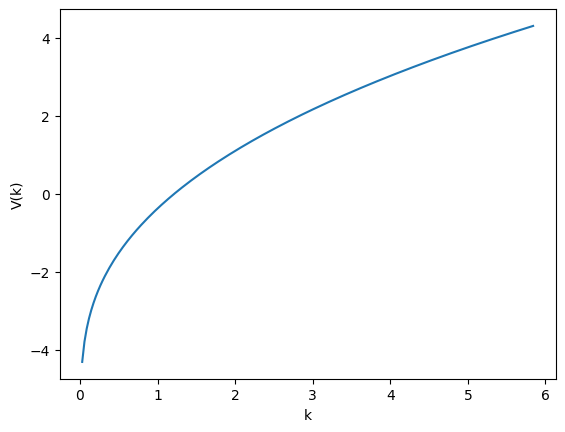

In [68]:
# Plot Value Function
plt.plot(gK, V)
plt.xlabel('k')
plt.ylabel('V(k)')
plt.show()

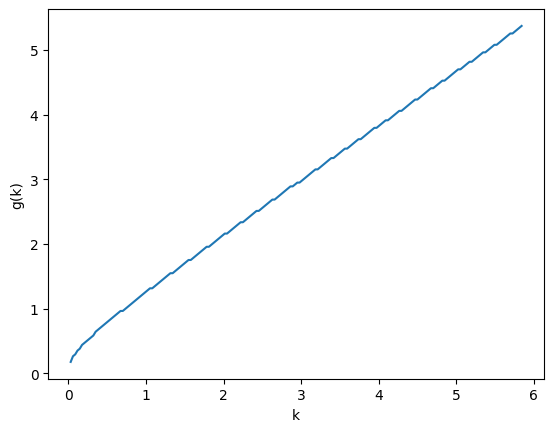

In [69]:
# Plot Policy Function
plt.plot(gK, g)
plt.xlabel('k')
plt.ylabel('g(k)')
plt.show()

In [70]:
# Ps. You can simulate the model now. 
# Guess an initial capital k0 in the grid.
# Now just use the policy function to get the next period capital k1 (on grid) and so on.
k0 = 1 # this is the grid point we start. 
T = 1000 # periods we simulate the model

kt = np.full(T, 0.0) # sequence of capital (values)
ktg = np.full(T, 0, dtype=int) # sequence of capital (grid points)

ktg[0] = k0
kt[0] = gK[k0]

for t in range(T-1):
    ktg[t+1] = gp[ktg[t]]
    kt[t+1] = gK[ktg[t+1]]

# Ps it converges to the Steady State pretty quixk
print(ktg)

[ 1  8 17 27 36 44 52 59 65 70 74 78 81 84 86 88 90 91 92 93 94 95 96 97
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98
 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98 98

In [71]:
# Ps it converges to the Steady State pretty quick
print(kt)

[0.05841644 0.26287399 0.52574799 0.8178302  1.0807042  1.31436997
 1.54803574 1.75249329 1.92774262 2.07378373 2.19061661 2.3074495
 2.39507416 2.48269883 2.54111527 2.59953171 2.65794816 2.68715638
 2.7163646  2.74557282 2.77478104 2.80398926 2.83319749 2.86240571
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393
 2.89161393 2.89161393 2.89161393 2.89161393 2.89161393 2.89161

In [72]:
# Compare numerica steady state with analytical steady state
print("Steady State Capital (Analytical): ", k_ss)
print("Steady State Capital (Numerical): ", kt[-1]) # last element of list
# Pretty far apart, this is expected since I use just a few grid points

Steady State Capital (Analytical):  2.920822149964071
Steady State Capital (Numerical):  2.8916139284644307
